<a href="https://colab.research.google.com/github/KayalvizhiT513/Walmart_lab1/blob/main/Clustering_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

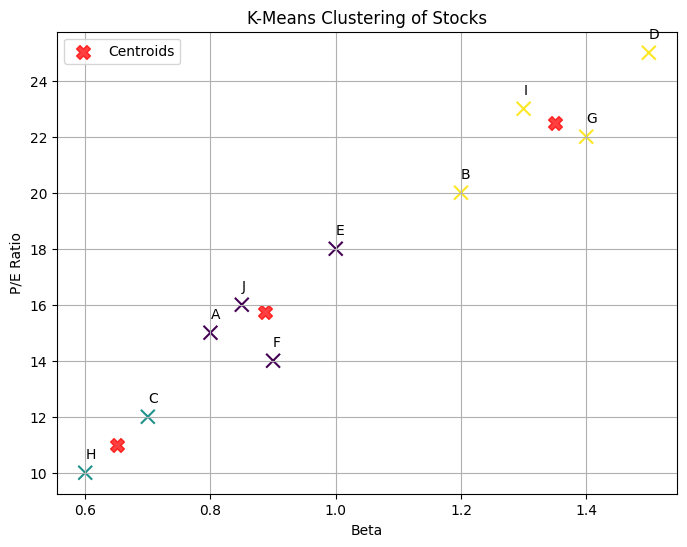

(  Stock  Cluster
 0     A        0
 1     B        2
 2     C        1
 3     D        2
 4     E        0
 5     F        0
 6     G        2
 7     H        1
 8     I        2
 9     J        0,
 None)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data setup
data = {
    'Stock': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Beta': [0.8, 1.2, 0.7, 1.5, 1.0, 0.9, 1.4, 0.6, 1.3, 0.85],
    'P/E Ratio': [15.0, 20.0, 12.0, 25.0, 18.0, 14.0, 22.0, 10.0, 23.0, 16.0]
}
df = pd.DataFrame(data)

# KMeans clustering
X = df[['Beta', 'P/E Ratio']]

kmeans = KMeans(n_clusters=3, random_state=1)
df['Cluster'] = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Beta'], df['P/E Ratio'], c=df['Cluster'], marker='x', cmap='viridis', s=100)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, marker='X', label='Centroids')
# Plot the stock name
for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], df['P/E Ratio'][i] + .5))
plt.xlabel('Beta')
plt.ylabel('P/E Ratio')
plt.title('K-Means Clustering of Stocks')
plt.legend()
plt.grid(True)

df[['Stock', 'Cluster']], plt.show()


In [12]:
# Compute intra-cluster variance for each feature
intra_cluster_variance = {}
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    var_beta = np.var(cluster_data['Beta'], ddof=0)
    var_pe = np.var(cluster_data['P/E Ratio'], ddof=0)
    intra_cluster_variance[cluster] = {'Beta Variance': var_beta, 'P/E Ratio Variance': var_pe}

for each in intra_cluster_variance:
    print(intra_cluster_variance[each])

{'Beta Variance': 0.00546875, 'P/E Ratio Variance': 2.1875}
{'Beta Variance': 0.0024999999999999988, 'P/E Ratio Variance': 1.0}
{'Beta Variance': 0.012499999999999999, 'P/E Ratio Variance': 3.25}


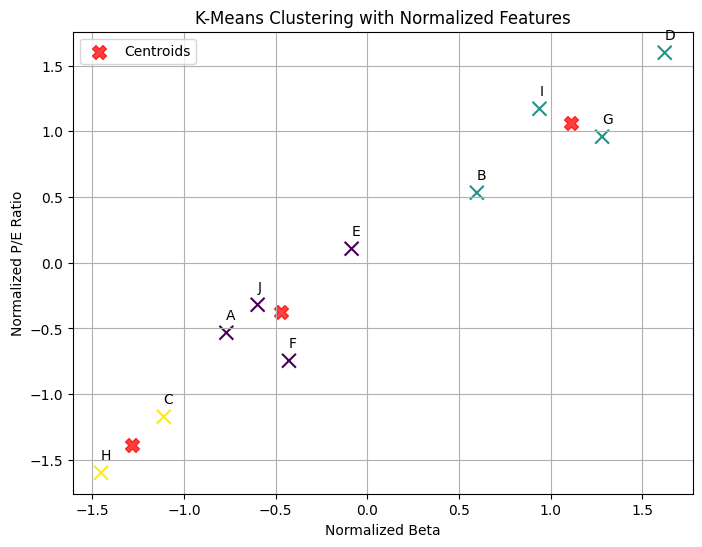

(  Stock  Cluster_Normalized
 0     A                   0
 1     B                   1
 2     C                   2
 3     D                   1
 4     E                   0
 5     F                   0
 6     G                   1
 7     H                   2
 8     I                   1
 9     J                   0,
 None)

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Beta', 'P/E Ratio']])

# KMeans clustering on normalized data
kmeans_scaled = KMeans(n_clusters=3, random_state=4)
df['Cluster_Normalized'] = kmeans_scaled.fit_predict(X_scaled)

# Plotting the clusters after normalization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster_Normalized'], marker='x', cmap='viridis', s=100)
centers_scaled = kmeans_scaled.cluster_centers_
plt.scatter(centers_scaled[:, 0], centers_scaled[:, 1], c='red', s=100, alpha=0.75, marker='X', label='Centroids')
# Plot the stock name
for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (X_scaled[:, 0][i], X_scaled[:, 1][i] + .1))
plt.xlabel('Normalized Beta')
plt.ylabel('Normalized P/E Ratio')
plt.title('K-Means Clustering with Normalized Features')
plt.legend()
plt.grid(True)

df[['Stock', 'Cluster_Normalized']], plt.show()


In [11]:
# Add scaled features to DataFrame for variance calculation
df['Beta_scaled'] = X_scaled[:, 0]
df['P/E_scaled'] = X_scaled[:, 1]

# Compute intra-cluster variance for each feature
intra_cluster_variance = {}
for cluster in sorted(df['Cluster_Normalized'].unique()):
    cluster_data = df[df['Cluster_Normalized'] == cluster]
    var_beta = np.var(cluster_data['Beta_scaled'], ddof=0)
    var_pe = np.var(cluster_data['P/E_scaled'], ddof=0)
    intra_cluster_variance[cluster] = {'Beta Variance': var_beta, 'P/E Ratio Variance': var_pe}

for each in intra_cluster_variance:
    print(intra_cluster_variance[each])

{'Beta Variance': 0.06386861313868612, 'P/E Ratio Variance': 0.09920634920634919}
{'Beta Variance': 0.14598540145985403, 'P/E Ratio Variance': 0.14739229024943307}
{'Beta Variance': 0.029197080291970812, 'P/E Ratio Variance': 0.045351473922902466}
